# <span style="color:darkblue"> Lecture 12: Application 2 - Random Assignment </span>

<font size = "5">



# <span style="color:darkblue"> I. Import Libraries and Data </span>


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
carfeatures = pd.read_csv("data_raw/features.csv")

# <span style="color:darkblue"> I. Random Assignment </span>

<font size = "5">

Random assignment is crucial for scientific progress ...

- The basis for medical trials
- Also used in engineering, the natural sciences and <br>
  social sciences (economics, political science, etc.)


In [22]:
# "list_status" is a list with "treatment/control" arms
# "prop_status" is the proportion in the treatment and control arms
# "size_dataset" is how many rows are contained

list_status  = ["Treatment","Control"]
prop_status  = [0.4,0.6]
size_dataset = len(carfeatures)

<font size = "5">
Random assignment


In [4]:
# The "np.random.choice" will create a vector with the status
# We will save this to a column in "carfeatures"
# Note: (i) We can always split the arguments of a function in multiple lines
#           to make it easier to read
#       (ii) 

carfeatures["status"] = np.random.choice(list_status,
                                         size = size_dataset,
                                         p = prop_status)

display(carfeatures)

,mpg,cylinders,displacement,horsepower,weight,acceleration,vehicle_id,status
0,18.0,8,307,130,3504,12.0,C-1689780,Control
1,15.0,8,350,165,3693,11.5,B-1689791,Treatment
2,18.0,8,318,150,3436,11.0,P-1689802,Treatment
3,16.0,8,304,150,3433,12.0,A-1689813,Control
4,17.0,8,302,140,3449,10.5,F-1689824,Control
...,...,...,...,...,...,...,...,...
393,27.0,4,140,86,2790,15.6,F-1694103,Control
394,44.0,4,97,52,2130,24.6,V-1694114,Control
395,32.0,4,135,84,2295,11.6,D-1694125,Treatment
396,28.0,4,120,79,2625,18.6,F-1694136,Control


<font size = "5">

Compute frequencies by status

In [5]:
# The command "pd.crosstab" computes frequencies
# If we add the option "normalize" it will compute proportions
# Note: The default assignment is done randomly without replacement
#       which means that the proportions are approximately the same   
#       (but not equal) to "prop_status"

frequency_table   = pd.crosstab(index = carfeatures["status"], columns = "Frequency")
proportions_table = pd.crosstab(index = carfeatures["status"],
                                columns = "Frequency",
                                normalize = True)

display(frequency_table)
display(proportions_table)


col_0,Frequency
status,
Control,234
Treatment,164


col_0,Frequency
status,
Control,0.58794
Treatment,0.41206


<font size = "5">

Query with string conditions

In [44]:
# When you have queries for text variables, it's important
# to use outer ' ' single quotations
# and inner double quotations.

data_treated = carfeatures.query('status == "Treatment" ')
data_control = carfeatures.query('status == "Control" ')

<font size = "5">

Treated/control should be similar

- This is the key principle of random assignment
- We can check the summary statistics

In [46]:
# The count is different because we assigned different proportions
# All other sumary statistics are approximately the same
# They are not identical because the assignment is random

display(data_treated.describe())
display(data_control.describe())

,mpg,cylinders,displacement,weight,acceleration
count,145.000000,145.000000,145.000000,145.000000,145.000000
mean,23.656552,5.558621,194.965517,2999.124138,15.622069
std,8.487383,1.735559,103.989477,862.268865,2.806626
min,9.000000,4.000000,68.000000,1760.000000,9.500000
25%,17.000000,4.000000,98.000000,2200.000000,13.900000
50%,22.000000,4.000000,144.000000,2910.000000,15.000000
75%,29.900000,8.000000,302.000000,3672.000000,17.300000
max,46.600000,8.000000,455.000000,5140.000000,24.600000


,mpg,cylinders,displacement,weight,acceleration
count,253.000000,253.000000,253.000000,253.000000,253.000000
mean,23.433202,5.395257,192.545455,2953.976285,15.537154
std,7.420168,1.681451,104.624019,839.151120,2.734372
min,10.000000,3.000000,70.000000,1613.000000,8.000000
25%,17.500000,4.000000,105.000000,2245.000000,13.800000
50%,23.000000,4.000000,151.000000,2735.000000,15.500000
75%,28.800000,6.000000,258.000000,3563.000000,17.000000
max,44.600000,8.000000,455.000000,4997.000000,24.800000


## <span style="color:darkblue"> III. Quiz Structure </span>

<font size = "5">

The day of the quiz I will ...
- Provide a dataset with information
- Give more specific instructions.
- Below, you will see the type of questions that will be asked.
- The idea is for you to apply known concepts to new data
- You have 50 minutes to complete the assignment

Questions

(exact wording may change in quiz, but exercise will be very similar)


<font size = "5">

(a) Create a function and apply it to a column

- Check Lecture 8 for how to define a function
- The function will have if/else statements and output a string
- You will use ".apply()" to create a new variable in the dataset <br>
(see Lecture 9)

In [12]:
numeric_grade = [74, 83, 96]


def fn_status(numeric_grade):
    if(numeric_grade >= 55):
        status = "pass"
    else:
        status = "fail"
    return(status)

def fn_grade(numeric_grade):
    if(numeric_grade >= 90):
        grade = "A"
    else:
        grade = "B"

def fn_compute_value(P,r,n,t):
    V = P*(1 + r/n)**(n*t)
    return(V)

V1 = fn_compute_value(P = 1000, r = 0.01, n = 20, t=10)
print(V1)

#or

def numeric_grade(grade):
    if (grade>=55):
        status="pass"
    else:
        status="fail"
    return(status)

print(numeric_grade(49))

#or

def fn_cars(first_name,last_name,car_model):
    return("Dear customer "+first_name+ " " + last_name + ", your car model " + car_model +" is ready")

print(fn_cars("Evan","Woska","Subaru"))

#for apply

data  = pd.DataFrame([])

data["age"]                   = [18,29,15,32,6]
data["num_underage_siblings"] = [0,0,1,1,0]
data["num_adult_siblings"]    = [1,0,0,1,0]

data

fn_iseligible_vote = lambda age: age >= 18
fn_istwenties      = lambda age: (age >= 20) & (age < 30)
fn_sum             = lambda x,y: x + y

def fn_agebracket(age):
    if (age >= 18):
        status = "Adult"
    elif (age >= 10) & (age < 18):
        status = "Adolescent"
    else:
        status = "Child"
    return(status)

data["can_vote"]    = data["age"].apply(fn_iseligible_vote)
data["in_twenties"] = data["age"].apply(fn_istwenties)
data["age_bracket"] = data["age"].apply(fn_agebracket)


1105.1432983541217
fail
Dear customer Evan Woska, your car model Subaru is ready


<font size = "5">

(b) Use queries + global variables

- You will be asked to compute certain summary statistics <br>
(mean, median, etc)
- The query will have multiple conditions
- Then subset a dataset that meets certain conditions
- See Lecture 10 for more details

In [18]:
datamean = data["age"].mean()
data["age"].median()
data["age"].std()

data_age_btw_10and20 = data.query("(age >= 10) & (age < 20)")
data_age_btw_10and20

data_above_mean = data.query("(age < @datamean) & (can_vote == True)")

data
data_above_mean

,age,num_underage_siblings,num_adult_siblings,can_vote,in_twenties,age_bracket
0,18,0,1,True,False,Adult


<font size = "5">

(c) Use sorting + ".loc[]"

- Extract the observations with the largest values of a column
- See Lecture 10 for details

In [21]:
datasorted = data.sort_values(by = "age", ascending = True)
display(datasorted)

#shows first 3
display(datasorted.iloc[[0,1,2],:])

#only shows first 2 line items, remember that the secondnnumber in the range is not included.
display(datasorted.iloc[0:2,:])

,age,num_underage_siblings,num_adult_siblings,can_vote,in_twenties,age_bracket
4,6,0,0,False,False,Child
2,15,1,0,False,False,Adolescent
0,18,0,1,True,False,Adult
1,29,0,0,True,True,Adult
3,32,1,1,True,False,Adult


,age,num_underage_siblings,num_adult_siblings,can_vote,in_twenties,age_bracket
4,6,0,0,False,False,Child
2,15,1,0,False,False,Adolescent
0,18,0,1,True,False,Adult


,age,num_underage_siblings,num_adult_siblings,can_vote,in_twenties,age_bracket
4,6,0,0,False,False,Child
2,15,1,0,False,False,Adolescent


<font size = "5">

(d) Split a dataset into subsets

- You will be asked to randomly assign a status to each row
- Split the data into separate datasets using ".query()"
- This will closely follow the material in Lecture 12 (this one)
- You will need this result to answer questions (e), (f)


In [23]:
list_status  = ["Treatment","Control"]
prop_status  = [0.3,0.7]
size_dataset = len(data)

data["status"] = np.random.choice(list_status,
                                    size = size_dataset,
                                    p = prop_status)

display(data)

data_treated = data.query('status == "Treatment" ')
data_control = data.query('status == "Control" ')

display(data_treated)
display(data_control)

,age,num_underage_siblings,num_adult_siblings,can_vote,in_twenties,age_bracket,status
0,18,0,1,True,False,Adult,Control
1,29,0,0,True,True,Adult,Control
2,15,1,0,False,False,Adolescent,Control
3,32,1,1,True,False,Adult,Control
4,6,0,0,False,False,Child,Control


,age,num_underage_siblings,num_adult_siblings,can_vote,in_twenties,age_bracket,status


,age,num_underage_siblings,num_adult_siblings,can_vote,in_twenties,age_bracket,status
0,18,0,1,True,False,Adult,Control
1,29,0,0,True,True,Adult,Control
2,15,1,0,False,False,Adolescent,Control
3,32,1,1,True,False,Adult,Control
4,6,0,0,False,False,Child,Control


<font size = "5">

(e) Create a function with four inputs $f(y,x,b0,b1)$

- Start by using "def" to define the function
- The function will include arithmetic operations (Lecture 3) <br>
and summary statistics for pandas (mean, std, min, max, etc.)
- You will be asked to test different values of $(y,x,b0,b1)$
- You will get $y$ and $x$ from the two datasets in part (d)
- Note: You will **not** be required to use the "statsmodels" library


In [27]:
def fn(y,x,b0,b1):
    V = x*b0+y*b1
    return(V)

n=100
x=np.random.normal(loc = 0,scale = 1, size = n)

y=4

b1= np.random.normal(loc = 0,scale = 1, size = n)

b0 = 1


<font size = "5">

(f) Create two overlapping histogram plots

- You will use a variable from the two datasets in (d)
- You need to use the "alpha" option to make the graphs semitransparent
- You will need to add a legend, label the axes, and the title
- Note: The goal of this question is to illustrate that random <br>
assignment produces very similar distributions between two groups

Text(0.5, 1.0, 'Age based on number of siblings')

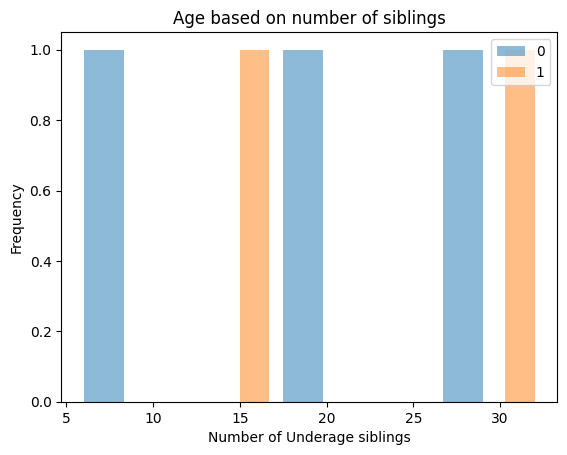

In [28]:
list_underage_siblings =  pd.unique(data["num_underage_siblings"])

for category_value in list_underage_siblings:
    temporarydataframe = data.query("num_underage_siblings == @category_value")
    plt.hist(temporarydataframe["age"],alpha = 0.5)

plt.legend(labels = list_underage_siblings)
plt.xlabel("Number of Underage siblings")
plt.ylabel("Frequency")
plt.title("Age based on number of siblings")


world_urban_data = pd.read_csv("data/wdi_urban.csv")


list_unique_year = pd.unique(world_urban_data["year"])

for category_value in list_unique_year:
    temporarydataframe = world_urban_data.query("year == @category_value")
    mp.hist(temporarydataframe["prop_urbanpopulation"],alpha = 0.5)

mp.legend(labels = list_unique_year)
mp.xlabel("Proportion of Urban Population")
mp.ylabel("Frequency")
mp.title("Urban Population in World")